A proof that the subset construction of Hopcraft, Motwani and Ullman can produce DFAs with 2^n states

In [1]:
from automata.fa.nfa import NFA
from automata.fa.dfa import DFA
from IPython.core.display import SVG

In [2]:
def create_nfa(size):
    def get_state_string(index):
        return 'q' + str(index)
    
    start_state = get_state_string(0)
    states = set()
    transitions = {}
    for index in range(1, size):
        states.add(get_state_string(index))
        state_transitions = {'0': {get_state_string((index + 1) % size)},
                             '1': {get_state_string(index), start_state}}
        transitions[get_state_string(index)] = state_transitions
    states.add(start_state)
    transitions[start_state] = {'0' : {get_state_string(1)}}
    
    return NFA(
        states=states,
        input_symbols={'0', '1'},
        transitions=transitions,
        initial_state=start_state,
        final_states={get_state_string(size-1)})

In [3]:
nfa = create_nfa(5)
dfa = DFA.from_nfa(nfa)

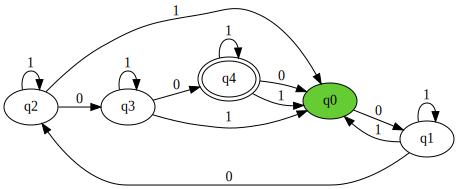

In [4]:
diagram = nfa.show_diagram()
img = diagram.create_svg()
SVG( data=img )

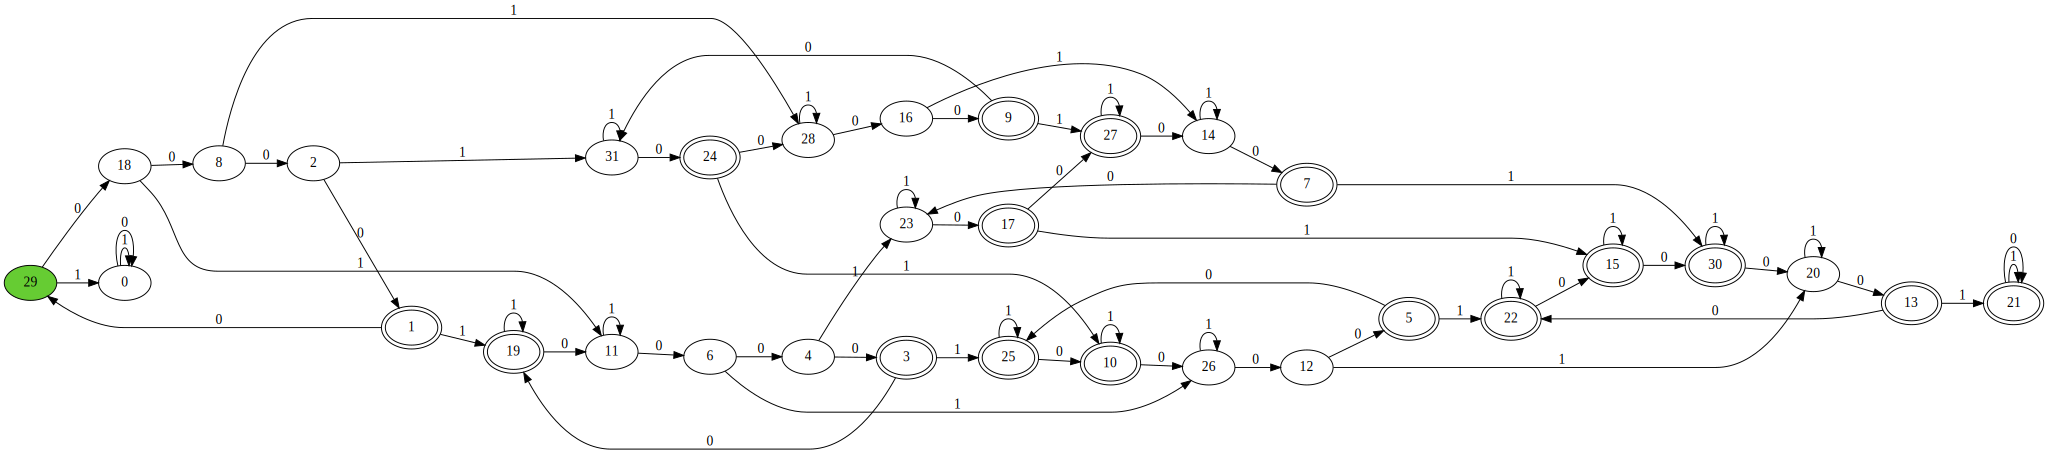

In [5]:
diagram = dfa.show_diagram()
img = diagram.create_svg()
SVG( data=img )

We leave the proof of correctness to the reader.